In [4]:
using Plots
#import Pkg; Pkg.add("SpecialFunctions")
using SpecialFunctions
#import Pkg; Pkg.add("ForwardDiff")
using ForwardDiff

The dispersion relation seems to be (according to the paper: arXiv:1702.04732v2)

$$
diss(k,x) = k^2 + 1 - \sqrt(\pi) [Erfi(x) - i]*x * e^{-x^2}
$$

with $x = \frac{\omega}{k \sqrt{2}}$ and $Erfi(x) = -iErf(ix)$ and

$$
Erf(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-t^2}\; dt
$$

**I guess this is for the non-relativistic dispersion relation**

Numerically is better to use the *Dawson* function,

$$
Dawson(x) = \frac{\sqrt{\pi}}{2} e^{-x^2} Erfi(x)
$$

$$
diss(k,x) = k^2 + 1 - 2 Dawson(x)*x + \sqrt(\pi) *x * e^{-x^2} 
$$

$$
\frac{d \; Erfi(x)}{dx} = -i \frac{d \; Erf(ix)}{dx} = -i \frac{d \; Erf(z)}{dz}|_{z=ix} \frac{dz}{dx} = \frac{d \; Erf(z)}{dz}|_{z=ix} = \frac{2}{\sqrt{\pi}} e^{x^2}
$$

$$
\frac{d \; diss}{dx} = - 2x - \sqrt(\pi) [Erfi(x) - i][1 - 2x^2]e^{-x^2}
$$

$$
\frac{d \; diss}{dx} = - 2x - 2 Dawson(x)[1 - 2x^2] + i\sqrt(\pi)[1 - 2x^2]e^{-x^2}
$$

$$
\frac{d \; diss}{d\omega} = \frac{d \; diss}{dx} \frac{dx}{\omega} = \frac{d \; diss}{dx} \frac{1}{k\sqrt{2}}
$$

In [5]:
function dis_plasma(k,ω)
    ν = ω/k
    return 1 + k^2 - sqrt(π/2)*(erfi(ν/sqrt(2))-im)*ν*exp(-ν^2/2)
end

function dis_plasma_l(k,ω)
    x = ω/k/sqrt(2)
    return 1 + k^2 - 2*dawson(x)*x + im*sqrt(π)*x*exp(-x^2/2)
end

dis_plasma_l (generic function with 1 method)

In [6]:
ω = 1.28506 - im*0.06613
omega = [1.285 - 0.001*im*i for i in 1:20]
k = 0.4
plot(omega, real.(dis_plasma_l.(0.4,omega)))

MethodError: MethodError: no method matching isless(::Float64, ::ComplexF64)
Closest candidates are:
  isless(::T, !Matched::T) where T<:Union{Float16, Float32, Float64} at /opt/julias/julia-1.7/share/julia/base/float.jl:460
  isless(::Real, !Matched::AbstractGray) at ~/.julia/packages/ColorTypes/1dGw6/src/operations.jl:39
  isless(::AbstractFloat, !Matched::AbstractFloat) at /opt/julias/julia-1.7/share/julia/base/operators.jl:184
  ...

In [4]:
dis_plasma_l(0.01, 1.00015)

-3.752775867837954e-12 + 0.0im

In [7]:
function ddiss(k,ω) 
    x = ω/k/sqrt(2)
    return (-2x - 2dawson(x)*(1-2x^2) + im*sqrt(π)*(1-2x^2)*exp(-x^2))/k/sqrt(2)
end
    

ddiss (generic function with 1 method)

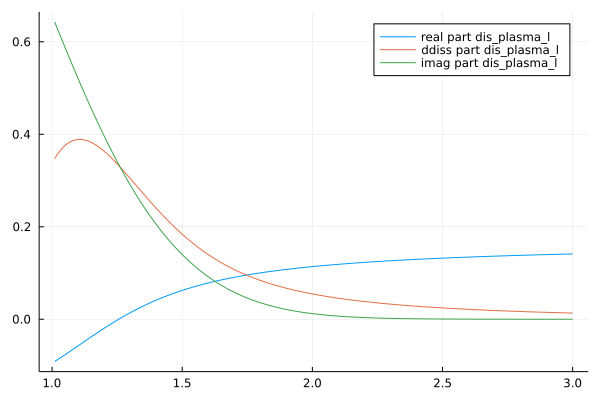

In [8]:
k = 0.4
omega = [1.0 + 0.01*i for i in 1:200]
plot(omega, real.(dis_plasma_l.(k,omega)),label="real part dis_plasma_l")
plot!(omega, real.(ddiss.(k,omega)),label="ddiss part dis_plasma_l")
plot!(omega, imag.(dis_plasma_l.(k,omega)), label="imag part dis_plasma_l")

Now we can apply Newton-Raphson method to find omega for given k.

In [103]:
n= 1000
k= 0.4
k= 0.35
ω = 1.225 - im*0.03
for i in 1:n
    ω = ω - dis_plasma_l(k,ω)/ddiss(k,ω)
    println(ω)
end


1.4276766486595374 - 0.6503565757318213im
-0.7520259609820774 - 0.3553691384645547im
-0.984507065504718 - 0.39235334791990384im
-1.166010876241824 - 0.6098709058931184im
-1.0221328835134047 - 0.890444666763748im
-0.9794478002218375 - 0.8779806307556559im
-0.9505467548029561 - 0.8762712991020587im
-0.9313390440620832 - 0.877176893647423im
-0.9181763389050506 - 0.8784416974599246im
-0.9089006369999987 - 0.8795107623897848im
-0.9022300722132633 - 0.8802911182172322im
-0.8973647309992934 - 0.8808148829225174im
-0.8937815118374284 - 0.8811406244363429im
-0.8911251867783473 - 0.8813239132888951im
-0.8891474437571416 - 0.8814097234249227im
-0.8876708972933965 - 0.8814319300485721im
-0.8865667832722809 - 0.8814149428673139im
-0.8857405392037997 - 0.8813757471186623im
-0.8851221431955331 - 0.8813257694956264im
-0.8846594471045095 - 0.881272407551896im
-0.8843134649665771 - 0.8812202159606756im
-0.8840549803490992 - 0.881171795177678im
-0.8838620682132529 - 0.8811284400960933im
-0.88371826541774

```
k=0.1
1.0151975255440968 - 4.044509892789115e-9im

k=0.01
1.0001500187596264 - 0.0im

k=0.4
1.0114042144218052 - 1.0069826941128959im
```
**The last one does not coincide with the paper.**

### the problem is that these functions are only defined for real arguments...

In [104]:
ω

-0.8833066272130855 - 0.8809139893626682im

In [117]:
ω = 1.28506 - im*0.06613
k = 0.4

@show dis_plasma(k,ω)
@show dis_plasma_l(k,ω)

dis_plasma(k,ω) - dis_plasma_l(k,ω)

dis_plasma(k, ω) = 9.36393008466041e-7 - 1.1261820156427405e-6im
dis_plasma_l(k, ω) = -0.054525966474546425 + 0.2796804178660469im


0.05452690286755489 - 0.27968154404806256im

In [9]:
function ω_r(k)
return    1 + 3/2*k^2 + 15/8*k^4 + 147/16*k^6+ 736.437*k^8 - 14729.3*k^(10) + 105429*k^(12) - 370151*k^(14) + 645538*k^(16) - 448190*k^(18)
end

ω_r(0.01) #OK

1.0001500187592611

In [14]:
k_n = [0.01; 0.35; 0.40; 0.45; 0.50]
ω_r_n = [1.00015; 1.22095; 1.28506; 1.35025; 1.41566]
ω_i_n = [0.0; −0.03432; −0.06613; −0.10629; −0.15336]

5-element Vector{Float64}:
  0.0
 -0.03432
 -0.06613
 -0.10629
 -0.15336

In [10]:
function ω_i_3(k)
    pu = -1/k^2/2 - 3/2 - 3*k^2 - 12*k^4
    pd = 1/k^3 - 6*k
    return -sqrt(π/8)*pd*exp(pu)
end

function ω_i_s(k)
    pu = -1/k^2/2 - 3/2
    pd = 1/k^3
    return -sqrt(π/8)*pd*exp(pu)
end

ω_i_3(0.40) - ω_i_s(0.40)


0.059015196013508166

In [34]:
function ω_i(k)
    pu = -1/k^2/2 - 3/2 - 3*k^2 - 12*k^4 - 575.516*k^6 + 3790.16*k^8 - 8827.54*k^(10) + 7266.87*k^(12)
    pd = 1/k^3 - 6*k - 40.7173*k^3 + 3900.23*k^5 - 2462.25*k^7 - 274.99*k^9 #esta está bien!
    #pd = 1/k^3 - 6*k - 40.7173*k^3 - 3900.23*k^5 - 2462.25*k^7 - 274.99*k^9 #from the paper seems to be wrong
    return -sqrt(π/8)*pd*exp(pu)
end

function ω_i_p(k)
    pu = -1/2/k^2 - 3/2 - 3*k^2 - 12*k^4 - 575.516*k^6 + 3790.16*k^8 - 8827.54*k^(10) + 7266.87*k^(12)
    #pd = 1/k^3 - 6*k - 40.7173*k^3 + 3900.23*k^5 - 2462.25*k^7 + 274.99*k^9 #esta anda mejor
    pd = 1/k^3 - 6*k - 40.717*k^3 - 3900.23*k^5 - 2462.25*k^7 - 274.99*k^9 #from the paper seems to be wrong
    return -sqrt(π/8)*pd*exp(pu)
end

ω_i(0.1) 

-2.6110715125934594e-20

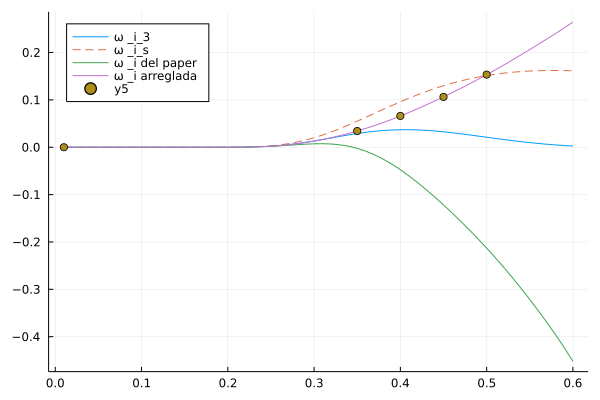

In [35]:
k = 0.01:0.01:0.6

plot( k, -ω_i_3.(k),label = "ω _i_3", legend=:topleft)
plot!(k, -ω_i_s.(k),label = "ω _i_s", ls=:dash)
plot!(k, -ω_i_p.(k),label = "ω _i del paper")
plot!(k, -ω_i.(k),label = "ω _i arreglada")
scatter!(k_n,-ω_i_n)


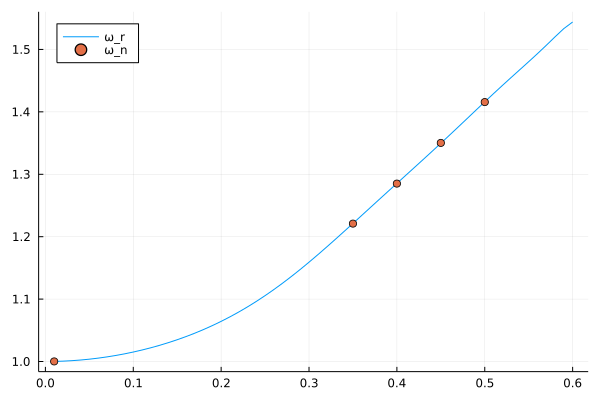

In [43]:
plot(k,ω_r.(k), legend=:topleft, label="ω_r")
scatter!(k_n,ω_r_n, label="ω_n")

Algunos valores que usaremos:

$k=0.1$, $\omega=1.0152026$

In [45]:
ω_r(0.1)

1.0152026807315955